In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np
import pandas as pd
from sklearn.metrics import (precision_recall_curve,PrecisionRecallDisplay)
from sklearn.metrics import precision_score,recall_score
from sklearn import metrics 
import seaborn as sns
import os 
import sys
import matplotlib.patches as mpatches
from nlcd_user import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
color_algo={'SVR':(0.8941176470588235, 0.10196078431372557, 0.10980392156862737),'ANN':(0.21568627450980393, 0.4941176470588236, 0.7215686274509804),'CIT':(0.3019607843137256, 0.6862745098039216, 0.29019607843137263),'KRR':(0.5960784313725492, 0.3058823529411765, 0.6392156862745098)}

In [1]:
# old function 
def calculate_precision_recall(causal,ind,iscit=False):
    precision=[]
    recall=[]
    presultscausal=pd.read_csv(causal)
    presultscausal=presultscausal.iloc[:,:-2]
    presultscausal.insert(0,column='GroundTruth',value=[1]*len(presultscausal))
    presultsind=pd.read_csv(ind)
    presultsind=presultsind.iloc[:,:-2]
    presultsind.insert(0,column='GroundTruth',value=[0]*len(presultsind))
    pMix=pd.concat([presultscausal,presultsind],ignore_index=True)
    if 'p_cit' in pMix.columns:
        pMix.rename(columns={'p_cit':'p_final'}, inplace=True)

    # removing NaN values, CIT might throw up some NaN values 
    uniq_val=np.unique(pMix['p_final'])
    uniq_val = uniq_val[~np.isnan(uniq_val)]
    for i in uniq_val:
        pMix['results']=pMix.apply (lambda row: 1 if row['p_final'] <=i   else 0, axis=1)
        precision.append(precision_score(pMix['GroundTruth'],pMix['results']))
        recall.append(recall_score(pMix['GroundTruth'],pMix['results']))

    return precision,recall 


In [3]:
# new function 
def calculate_precision_recall(causal,ind,iscit=False):
    precision=[]
    recall=[]
    presultscausal=pd.read_csv(causal)
    presultscausal=presultscausal.iloc[:,:-2]
    presultscausal.insert(0,column='GroundTruth',value=[1]*len(presultscausal))
    presultsind=pd.read_csv(ind)
    presultsind=presultsind.iloc[:,:-2]
    presultsind.insert(0,column='GroundTruth',value=[0]*len(presultsind))
    pMix=pd.concat([presultscausal,presultsind],ignore_index=True)
    if 'p_cit' in pMix.columns:
        pMix.rename(columns={'p_cit':'p_final'}, inplace=True)
    gt=pMix['GroundTruth']
    pred=pMix['p_final']
    mask = ~np.isnan(pred)
    gt=gt[mask]
    pred=pred[mask]
    pred=1-pred  # taking 1 minus , because in our case lesser the p-value, the better. but in the curve function higher the better
    precision,recall,thresholds=precision_recall_curve(gt,pred,pos_label=1)

    return precision,recall 

        

In [52]:
#to calculate the number of calls for each test and the final calls 
presults=pd.read_csv('./results/compare/Sine300nlcd.csv',header=0)#,dtype={'seed':str})
#remove the seed column 
presults = presults.iloc[: , :-2]
presults['final_v1']=presults.apply(lambda row: max(row[0],row[1],row[4],row[5]),axis=1)
presults['final_v2']=presults.apply(lambda row: max(row[0],row[2],row[4],row[5]),axis=1)
presults['final_v3']=presults.apply(lambda row: max(row[0],row[3],row[4],row[5]),axis=1)

In [53]:
print(sum(presults['final_v1']<0.05))
print(sum(presults['LA|Bv1']<0.05))

36
89


In [54]:
print(sum(presults['final_v2']<0.05))
print(sum(presults['LA|Bv2']<0.05))

36
90


In [55]:
print(sum(presults['final_v3']<0.05))
print(sum(presults['LA|Bv3']<0.05))

36
90


,LB_p,LA|Bv1,LA|Bv2,LA|Bv3,AB|L,LindB|A,OSt2v2,OSt2v3,OSt4
0,0.264706,0.745098,0.333333,0.058824,0.372549,0.303922,0.431693,0.438001,0.435401
1,0.264706,0.372549,0.843137,0.441176,0.009804,0.813725,0.466124,0.467440,0.472615
2,0.303922,0.421569,0.843137,0.500000,0.009804,0.039216,0.473217,0.480000,0.472115
3,0.578431,0.333333,0.852941,0.715686,0.009804,0.029412,0.475872,0.477280,0.468411
4,0.392157,0.588235,0.990196,0.931373,0.009804,0.019608,0.471787,0.477788,0.470505
...,...,...,...,...,...,...,...,...,...
95,0.009804,0.274510,0.029412,0.019608,0.009804,0.009804,0.001924,0.002445,0.001445
96,0.009804,0.088235,0.029412,0.098039,0.009804,0.009804,0.002825,0.003103,0.000379
97,0.009804,0.333333,0.009804,0.009804,0.009804,0.009804,0.000672,0.001085,0.000465
98,0.009804,0.803922,0.107843,0.274510,0.009804,0.009804,0.002472,0.002130,0.001512


In [78]:
# function not yet updated to make the table 
''' 
def make_table(res,ind,permutations=100,iscit=False):
    precision=[]
    recall=[]
    TN=[]
    FN=[]
    FP=[]
    TP=[]
    if iscit==True:
        citpresults= pd.read_csv(res,skiprows=[1])
        citpresults.loc[:,'p_res'] = 1
        citpresultsInd= pd.read_csv(ind,skiprows=[1])
        citpresultsInd.loc[:,'p_res'] = 0
        pCitMix=pd.concat([citpresults,citpresultsInd],ignore_index=True)
        pCitMix.columns= ['pred','p_TL', 'p_TG', 'p_GL','p_Lind','GroundTruth']
        uniq_val=np.unique(pCitMix['pred'])
        
        for i in uniq_val:
            pCitMix['results']=pCitMix.apply (lambda row: 1 if row['pred'] <=i   else 0, axis=1)
            confusion_matrix = metrics.confusion_matrix(pCitMix['GroundTruth'], pCitMix['results']) 
            TN.append(confusion_matrix[0][0])
            FN.append(confusion_matrix[1][0])
            FP.append(confusion_matrix[0][1])
            TP.append(confusion_matrix[1][1])
            precision.append(precision_score(pCitMix['GroundTruth'],pCitMix['results']))
            recall.append(recall_score(pCitMix['GroundTruth'],pCitMix['results']))
        
    else:
        presults= pd.read_csv(res,header=None,skiprows=1)
        presults=presults.iloc[:,:-1]
        presults.insert(0,column='Groundtruth',value=[1]*len(presults))
        
        presultsInd=pd.read_csv(ind,header=None,skiprows=1)
        presultsInd = presultsInd.iloc[: , :-1]
        presultsInd.insert(0,column='Groundtruth',value=[0]*len(presultsInd))

        pMix=pd.concat([presults,presultsInd],ignore_index=True)
        pMix.columns= ['GroundTruth','p_L->A', 'p_L->B', 'conditional','p_L->A|B']
        pMix['pred']=pMix.apply (lambda row: max(row[1],row[2],row[3],row[4]) , axis=1) 
        pMix['pred']=pMix.apply (lambda row: (row['pred']*permutations+1)/(permutations+2) , axis=1)
        uniq_val=np.unique(pMix['pred']).sort()
        for i in uniq_val:
            pMix['results']=pMix.apply (lambda row: 1 if row['pred'] <=i   else 0, axis=1)
            confusion_matrix = metrics.confusion_matrix(pMix['GroundTruth'], pMix['results']) 
            TN.append(confusion_matrix[0][0])
            FN.append(confusion_matrix[1][0])
            FP.append(confusion_matrix[0][1])
            TP.append(confusion_matrix[1][1])
            precision.append(precision_score(pMix['GroundTruth'],pMix['results']))
            recall.append(recall_score(pMix['GroundTruth'],pMix['results']))
    
    table=pd.DataFrame(np.column_stack([uniq_val,TP,FP,TN,FN,precision,recall]),columns=['p cutoffs','TP','FP','TN','FN','precision','recall'])
            
    return table
'''

In [15]:
nlcd_table=make_table("./results/nlcor_yeast/causal350p100.txt","./results/nlcor_yeast/indep350p100.txt")


In [16]:
nlcd_table.to_csv("./results/nlcor_yeast/nlcd_prtable.csv",index=False)

In [10]:
cit_table=make_table("./results/nlcor_yeast/yeastcausal350cit.csv","./results/nlcor_yeast/yeastindp350cit.csv",iscit=True)

In [12]:
cit_table.to_csv("./results/nlcor_yeast/cit_prtable.csv",index=False)

In [33]:
def fig2_a():
    ####### figure 2 overlap depiction ############

    dflinear=read_data("./data/Linear500.txt") # going to read the data with the 52nd index 
    dfsine=read_data("./data/Sine500.txt") # going to read the data with the 54th index
    dfsaw=read_data("./data/Saw500.txt") # going to read the data with the 54th index 
    norows = 1
    nocols = 3

    fig, ax = plt.subplots(nrows=norows, ncols=nocols, sharey=True, figsize=(10, 4))
    fig.suptitle('Example plots for different datatypes')

    curr_ax = ax[0]
    plot_index = 0
    scatter = curr_ax.scatter(dflinear[52][1], dflinear[52][2], c=dflinear[52][0], cmap='viridis', alpha=0.6)
    shade = curr_ax.axvspan(xmin=0.3, xmax=2, alpha=0.3, color='gray')  # Add shaded area
    curr_ax.set_xlabel('A')
    curr_ax.set_ylabel('B')
    curr_ax.set_title('Linear')
    # Create custom legend handles with correct colors
    unique_labels = set(dfsaw[54][0])
    num_labels = len(unique_labels)
    colors = plt.cm.get_cmap('viridis', num_labels)(range(num_labels))
    cmap = ListedColormap(colors)
    legend_handles = [mpatches.Patch(color=color, label=f'L={label}') for color, label in zip(colors, unique_labels)]

    # Create legend handles and labels for the shaded area
    shade_handle = mpatches.Patch(facecolor='gray', edgecolor='black', alpha=0.3, label='Shaded Area')

    # Combine legend handles and labels
    handles = legend_handles + [shade_handle]
    labels = ['L=0', 'L=1', 'Overlap']

    # Add the combined legend to the subplot
    curr_ax.legend(handles, labels, loc='lower right')

    curr_ax = ax[1]
    plot_index += 1
    scatter = curr_ax.scatter(dfsine[54][1], dfsine[54][2], c=dfsine[54][0], cmap='viridis', alpha=0.6)
    shade = curr_ax.axvspan(xmin=0, xmax=2, alpha=0.3, color='gray')  # Add shaded area
    curr_ax.set_xlabel('A')
    curr_ax.set_ylabel('B')
    curr_ax.set_title('Sine')

    curr_ax = ax[2]
    plot_index += 1
    scatter = curr_ax.scatter(dfsaw[54][1], dfsaw[54][2], c=dfsaw[54][0], cmap='viridis', alpha=0.6)
    shade = curr_ax.axvspan(xmin=0.3, xmax=2, alpha=0.3, color='gray')  # Add shaded area
    curr_ax.set_xlabel('A')
    curr_ax.set_ylabel('B')
    curr_ax.set_title('Saw')



    plt.tight_layout()
    plt.savefig("./results/journal/plots/fig2_example.png", bbox_inches='tight', dpi=1200)
    plt.savefig('./results/journal/plots/fig2_example.svg', bbox_inches='tight', format='svg', dpi=1200)

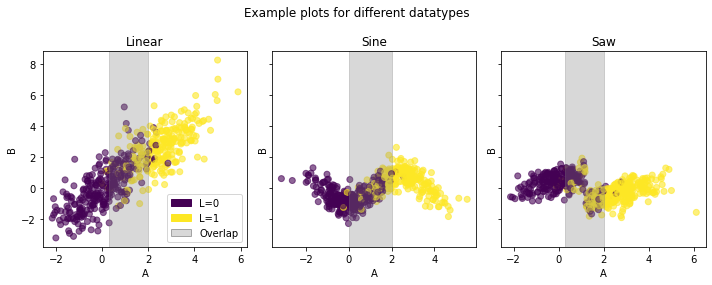

In [34]:
fig2_a()

In [28]:
def fig2_suppl_a():
    ### Figure 2 supplementary ################

    norows=3
    nocols=3
    fig, ax = plt.subplots(nrows=norows, ncols=nocols, sharex=True, sharey=True, figsize=(10,10))
    fig.suptitle("Precision-Recall Curve plots for 100 permutations ")
    #fig.text(0.5, 1, 'Precision-Recall Curve plots', ha='center')
    #fig.text(0.22, 1, 'Linear', ha='center')
    #fig.text(0.52, 1, 'Sine', ha='center')
    #fig.text(0.85, 1, 'Saw', ha='center')
    fig.text(0,0.20, 'Sample size 1000', va='center', rotation='vertical')
    fig.text(0,0.50, 'Sample size 500', va='center', rotation='vertical')
    fig.text(0,0.79, 'Sample size 300', va='center', rotation='vertical')

    plot_index = 0

    for i in ['300', '500', '1000'] :
        for j in ['Linear', 'Sine', 'Saw']:
            for k in [ '100']: # put 100 permutations in supplementary 
                precision_nlmr_SVR, recall_nlmr_SVR = calculate_precision_recall("./results/journal/simulation/nlcd/" + j + "SVR" + i + "s" + k + "perm.csv", "./results/journal/simulation/nlcd/IndpSVR" + i + "s" + k + "perm.csv")
                precision_nlmr_KRR, recall_nlmr_KRR = calculate_precision_recall("./results/journal/simulation/nlcd/" + j + "KRR" + i + "s" + k + "perm.csv", "./results/journal/simulation/nlcd/IndpKRR" + i + "s" + k + "perm.csv")
                precision_nlmr_ANN, recall_nlmr_ANN = calculate_precision_recall("./results/journal/simulation/nlcd/" + j + "ANN" + i + "s" + k + "perm.csv", "./results/journal/simulation/nlcd/IndpANN" + i + "s" + k + "perm.csv")
                precision_CIT, recall_CIT = calculate_precision_recall("./results/journal/simulation/cit/" + j + i + "cit" + k + "perm.csv", "./results/journal/simulation/cit/Indp" + i + "cit" + k + "perm.csv")

                curr_ax = ax[plot_index // nocols, plot_index % nocols]
                
                curr_ax.plot(recall_CIT,precision_CIT,color=color_algo['CIT'])
                curr_ax.plot(recall_nlmr_ANN,precision_nlmr_ANN,color=color_algo['ANN'])
                curr_ax.plot(recall_nlmr_SVR,precision_nlmr_SVR,color=color_algo['SVR'])
                curr_ax.plot(recall_nlmr_KRR,precision_nlmr_KRR,color=color_algo['KRR'])
                #disp = PrecisionRecallDisplay(precision=precision_nlmr_SVR, recall=recall_nlmr_SVR)
                #disp.plot(ax=curr_ax, color=color_algo['SVR'])
                #disp = PrecisionRecallDisplay(precision=precision_nlmr_ANN, recall=recall_nlmr_ANN)
                #disp.plot(ax=curr_ax, color=color_algo['ANN'])
                #disp = PrecisionRecallDisplay(precision=precision_CIT, recall=recall_CIT)
                #disp.plot(ax=curr_ax, color=color_algo['CIT'])
                #disp = PrecisionRecallDisplay(precision=precision_nlmr_KRR, recall=recall_nlmr_KRR)
                #disp.plot(ax=curr_ax, color=color_algo['KRR'])
                curr_ax.set_ylabel('')
                curr_ax.set_xlabel('')
                if(plot_index // nocols == 0 and plot_index % nocols == 0):
                    curr_ax.set_title('Linear')
                elif(plot_index // nocols == 0 and plot_index % nocols == 1):
                    curr_ax.set_title('Sine')
                elif(plot_index // nocols == 0 and plot_index % nocols == 2):
                    curr_ax.set_title('Sawtooth')   
                if(plot_index % nocols == 0):
                    curr_ax.set_ylabel('Precision')
                if(plot_index //nocols == (norows-1)):
                    curr_ax.set_xlabel('Recall')
                if(plot_index // nocols == norows-1 and plot_index % nocols == 0) :# if the plot is lower left, then add the legend in that plot
                    xindex=norows-1
                    yindex=0
                    handles = [ax[xindex, yindex].lines[3],ax[xindex,yindex].lines[2], ax[xindex, yindex].lines[1],ax[xindex, yindex].lines[0]]
                    labels = ['NLCD (KRR)','NLCD (SVR)', 'NLCD (ANN)',  'CIT (baseline)']
                    curr_ax.legend(handles,labels,loc="lower left")
            

                plot_index += 1

    #plt.tight_layout()
    # Create a common legend
    #handles = [ax[0, 0].lines[0], ax[0, 0].lines[1], ax[0, 0].lines[2], ax[0, 0].lines[3]]
    #labels = ['SVR', 'ANN', 'CIT', 'KRR']
    #fig.legend(handles, labels, loc='lower left')
    fig.tight_layout()
    #plt.savefig("./results/journal/plots/fig_2_suppl_a.png",bbox_inches='tight',dpi=1200)
    #plt.savefig('./results/journal/plots/fig_2_suppl_a.svg', bbox_inches='tight',format='svg', dpi=1200)


In [37]:
def fig2_suppl_b():
    #### Figure 2 supplementary b ###########
    norows = 2
    nocols = 2
    fig, ax = plt.subplots(nrows=norows, ncols=nocols, sharex=True, sharey=True, figsize=(8, 7))
    fig.suptitle("Hex plot of p-values from A->B vs B->A p for NLCD(KRR) 100 permutations ")
    plot_index = 0

    for j in ['Linear', 'Sine', 'Saw', 'Indp']:
        dfcausal = pd.read_csv('./results/journal/2way/' + j + 'KRR500s100perm.csv')
        dfrev = pd.read_csv('./results/journal/2way/' + j + 'KRR500s100perm_rev.csv')
        curr_ax = ax[plot_index // nocols, plot_index % nocols]
        hb = curr_ax.hexbin(dfcausal['p_final'], dfrev['p_final'], gridsize=5, mincnt=1, cmap='Blues')
        
        if(plot_index == 0 or plot_index == 2):
            curr_ax.set_ylabel('B->A')
        else:
            curr_ax.set_ylabel('')
        curr_ax.set_xlabel('A->B ')
        
        if(j == 'Linear'):
            curr_ax.set_title('Linear')
        elif(j == 'Sine'):
            curr_ax.set_title('Sine')
        elif(j == 'Saw'):
            curr_ax.set_title('Sawtooth')
        elif(j == 'Indp'):
            curr_ax.set_title('Independent')
        
        plot_index += 1

    cbar_ax = fig.add_axes([0.93, 0.15, 0.03, 0.7])  # Adjust the position and size of the colorbar as needed
    cbar = fig.colorbar(hb, cax=cbar_ax)
    cbar.set_label('Counts')


    plt.savefig("./results/journal/plots/fig_2_suppl_b.png", bbox_inches='tight', dpi=1200)
    plt.savefig('./results/journal/plots/fig_2_suppl_b.svg', bbox_inches='tight', format='svg', dpi=1200)

In [24]:
def fig2_b():
    ### Figure 2 ################

    norows=3
    nocols=3
    fig, ax = plt.subplots(nrows=norows, ncols=nocols, sharex=True, sharey=True, figsize=(10,10))
    fig.suptitle("Precision-Recall Curve plots for 500 permutations ")
    #fig.text(0.5, 1, 'Precision-Recall Curve plots', ha='center')
    #fig.text(0.22, 1, 'Linear', ha='center')
    #fig.text(0.52, 1, 'Sine', ha='center')
    #fig.text(0.85, 1, 'Saw', ha='center')
    fig.text(0,0.20, 'Sample size 1000', va='center', rotation='vertical')
    fig.text(0,0.50, 'Sample size 500', va='center', rotation='vertical')
    fig.text(0,0.79, 'Sample size 300', va='center', rotation='vertical')
    plot_index = 0

    for i in ['300', '500', '1000'] :
        for j in ['Linear', 'Sine', 'Saw']:
            for k in [ '500']: # put 100 permutations in supplementary 
                precision_nlmr_SVR, recall_nlmr_SVR = calculate_precision_recall("./results/journal/simulation/nlcd/" + j + "SVR" + i + "s" + k + "perm.csv", "./results/journal/simulation/nlcd/IndpSVR" + i + "s" + k + "perm.csv")
                precision_nlmr_KRR, recall_nlmr_KRR = calculate_precision_recall("./results/journal/simulation/nlcd/" + j + "KRR" + i + "s" + k + "perm.csv", "./results/journal/simulation/nlcd/IndpKRR" + i + "s" + k + "perm.csv")
                precision_nlmr_ANN, recall_nlmr_ANN = calculate_precision_recall("./results/journal/simulation/nlcd/" + j + "ANN" + i + "s" + k + "perm.csv", "./results/journal/simulation/nlcd/IndpANN" + i + "s" + k + "perm.csv")
                precision_CIT, recall_CIT = calculate_precision_recall("./results/journal/simulation/cit/" + j + i + "cit" + k + "perm.csv", "./results/journal/simulation/cit/Indp" + i + "cit" + k + "perm.csv")

                curr_ax = ax[plot_index // nocols, plot_index % nocols]
                curr_ax.plot(recall_CIT,precision_CIT,color=color_algo['CIT'])
                curr_ax.plot(recall_nlmr_ANN,precision_nlmr_ANN,color=color_algo['ANN'])
                curr_ax.plot(recall_nlmr_SVR,precision_nlmr_SVR,color=color_algo['SVR'])
                curr_ax.plot(recall_nlmr_KRR,precision_nlmr_KRR,color=color_algo['KRR'])
                #disp = PrecisionRecallDisplay(precision=precision_nlmr_SVR, recall=recall_nlmr_SVR)
                #disp.plot(ax=curr_ax, color=color_algo['SVR'])#,marker='.') #https://matplotlib.org/2.1.2/api/_as_gen/matplotlib.pyplot.plot.html
                #disp = PrecisionRecallDisplay(precision=precision_nlmr_ANN, recall=recall_nlmr_ANN)
                #disp.plot(ax=curr_ax, color=color_algo['ANN'])
                #disp = PrecisionRecallDisplay(precision=precision_CIT, recall=recall_CIT)
                #disp.plot(ax=curr_ax, color=color_algo['CIT'])
                #disp = PrecisionRecallDisplay(precision=precision_nlmr_KRR, recall=recall_nlmr_KRR)
                #disp.plot(ax=curr_ax, color=color_algo['KRR'])
                curr_ax.set_ylabel('')
                curr_ax.set_xlabel('')
                # set datatype as titles 
                if(plot_index // nocols == 0 and plot_index % nocols == 0):        
                    curr_ax.set_title('Linear')
                elif(plot_index // nocols == 0 and plot_index % nocols == 1):
                    curr_ax.set_title('Sine')
                elif(plot_index // nocols == 0 and plot_index % nocols == 2):
                    curr_ax.set_title('Sawtooth')   
                if(plot_index % nocols == 0):   # if its the second row then add the y labels 
                    curr_ax.set_ylabel('Precision')
                if(plot_index //nocols == (norows-1)): # if its the last row then add x labels 
                    curr_ax.set_xlabel('Recall')
                if(plot_index // nocols == norows-1 and plot_index % nocols == 0) :# if the plot is lower left, then add the legend in that plot
                    xindex=norows-1
                    yindex=0
                    handles = [ax[xindex, yindex].lines[3],ax[xindex,yindex].lines[2], ax[xindex, yindex].lines[1],ax[xindex, yindex].lines[0]]
                    labels = ['NLCD (KRR)','NLCD (SVR)', 'NLCD (ANN)',  'CIT (baseline)']
                    curr_ax.legend(handles,labels,loc="lower left")

                
                plot_index += 1

    #plt.tight_layout()
    # Create a common legend
    #handles = [ax[0, 0].lines[0], ax[0, 0].lines[1], ax[0, 0].lines[2], ax[0, 0].lines[3]]
    #labels = ['SVR', 'ANN', 'CIT', 'KRR']
    #fig.legend(handles, labels, loc='lower left')

    fig.tight_layout()
    plt.savefig("./results/journal/plots/fig2.png",bbox_inches='tight',dpi=1200)
    plt.savefig('./results/journal/plots/fig2.svg', bbox_inches='tight',format='svg', dpi=1200)


In [39]:
def fig2_suppl_c():
    ### Figure 2 supplementary c c################

    norows=2
    nocols=3
    fig, ax = plt.subplots(nrows=norows, ncols=nocols, sharex=True, sharey=True, figsize=(8,5))
    fig.suptitle("PR curves for 10 runs ")

    plot_index = 0

    for k in [ '100','500']: 
        for j in ['Linear','Sine','Saw']:
            for i in ['1','2','3','4','5','6','7','8','9','10']:
                precision_nlmr_KRR, recall_nlmr_KRR = calculate_precision_recall("./results/journal/10run/runvariation/nlcd/"+j+"KRR500s" + k +"perm"+i+"run"+".csv", "./results/journal/10run/runvariation/nlcd/IndpKRR500s" + k + "perm"+i+"run"+".csv")
                precision_CIT, recall_CIT = calculate_precision_recall("./results/journal/10run/runvariation/cit/"+j+"500cit" + k + "perm"+"run"+i+".csv", "./results/journal/10run/runvariation/cit/Indp500cit" + k + "perm"+"run"+i+".csv")

                curr_ax = ax[ plot_index//nocols,plot_index % nocols]

                #disp = PrecisionRecallDisplay(precision=precision_nlmr_KRR, recall=recall_nlmr_KRR)
                #disp.plot(ax=curr_ax, color=color_algo['KRR'])#,marker='.') #https://matplotlib.org/2.1.2/api/_as_gen/matplotlib.pyplot.plot.html
                #disp = PrecisionRecallDisplay(precision=precision_CIT, recall=recall_CIT)
                #disp.plot(ax=curr_ax, color=color_algo['CIT'])
                curr_ax.plot(recall_nlmr_KRR,precision_nlmr_KRR,color=color_algo['KRR'])
                curr_ax.plot(recall_CIT,precision_CIT,color=color_algo['CIT'])    
                curr_ax.set_ylabel('')
                curr_ax.set_xlabel('')
            if(plot_index // nocols == 0 and plot_index % nocols == 0):
                curr_ax.set_title("Linear")
                curr_ax.set_ylabel("Permutations=100 \n Precision ")
            if(plot_index // nocols == 0 and plot_index % nocols == 1):
                curr_ax.set_title("Sine")
            if(plot_index // nocols == 0 and plot_index % nocols == 2):
                curr_ax.set_title("Sawtooth")
            if(plot_index // nocols == 1 ):
                if(plot_index % nocols == 0):
                    curr_ax.set_ylabel("Permutations=500 \n Precision")
                curr_ax.set_xlabel("Recall")
                
            if(plot_index // nocols == 1 and plot_index % nocols == 0) :
                xindex=norows-1
                yindex=0
                handles = [curr_ax.lines[0],curr_ax.lines[1]]
                labels = ['NLCD (KRR)','CIT (baseline)']
                curr_ax.legend(handles,labels,loc="lower left")
            
            plot_index += 1
        


    fig.tight_layout()
    plt.savefig("./results/journal/plots/fig_2_suppl_c.png",bbox_inches='tight',dpi=1200)
    plt.savefig('./results/journal/plots/fig_2_suppl_c.svg', bbox_inches='tight',format='svg', dpi=1200)


In [40]:
def fig2_suppl_d():
    ### Figure 2 supplementary d ################

    norows=2
    nocols=3
    fig, ax = plt.subplots(nrows=norows, ncols=nocols, sharex=True, sharey=True, figsize=(8,5))
    fig.suptitle("PR curves for 10 different datasets ")

    plot_index = 0

    for k in [ '100','500']: 
        for j in ['Linear','Sine','Saw']:
            for i in ['1','2','3','4','5','6','7','8','9','10']:
                precision_nlmr_KRR, recall_nlmr_KRR = calculate_precision_recall("./results/journal/10run/datavariation/nlcd/"+j+"KRR500s" + k +"perm"+i+"run"+".csv", "./results/journal/10run/datavariation/nlcd/IndpKRR500s" + k + "perm"+i+"run"+".csv")
                precision_CIT, recall_CIT = calculate_precision_recall("./results/journal/10run/datavariation/cit/"+j+"500cit" + k + "perm"+"run"+i+".csv", "./results/journal/10run/datavariation/cit/Indp500cit" + k + "perm"+"run"+i+".csv")

                curr_ax = ax[ plot_index//nocols,plot_index % nocols]

                #disp = PrecisionRecallDisplay(precision=precision_nlmr_KRR, recall=recall_nlmr_KRR)
                #disp.plot(ax=curr_ax, color=color_algo['KRR'])#,marker='.') #https://matplotlib.org/2.1.2/api/_as_gen/matplotlib.pyplot.plot.html
                #disp = PrecisionRecallDisplay(precision=precision_CIT, recall=recall_CIT)
                #disp.plot(ax=curr_ax, color=color_algo['CIT'])
                curr_ax.plot(recall_nlmr_KRR,precision_nlmr_KRR,color=color_algo['KRR'])
                curr_ax.plot(recall_CIT,precision_CIT,color=color_algo['CIT'])    
                curr_ax.set_ylabel('')
                curr_ax.set_xlabel('')
            if(plot_index // nocols == 0 and plot_index % nocols == 0):
                curr_ax.set_title("Linear")
                curr_ax.set_ylabel("Permutations=100 \n Precision")
            if(plot_index // nocols == 0 and plot_index % nocols == 1):
                curr_ax.set_title("Sine")
            if(plot_index // nocols == 0 and plot_index % nocols == 2):
                curr_ax.set_title("Sawtooth")
            if(plot_index // nocols == 1 ):
                if(plot_index % nocols == 0):
                    curr_ax.set_ylabel("Permutations=500 \n Precision")
                curr_ax.set_xlabel("Recall")
                
            if(plot_index // nocols == 1 and plot_index % nocols == 0) :
                xindex=norows-1
                yindex=0
                handles = [curr_ax.lines[0],curr_ax.lines[1]]
                labels = ['NLCD (KRR)','CIT (baseline)']
                curr_ax.legend(handles,labels,loc="lower left")
            
            plot_index += 1
        


    fig.tight_layout()
    plt.savefig("./results/journal/plots/fig_2_suppl_d.png",bbox_inches='tight',dpi=1200)
    plt.savefig('./results/journal/plots/fig_2_suppl_d.svg', bbox_inches='tight',format='svg', dpi=1200)


In [25]:
def fig3_a():
    ### Figure 3 variance plot #################### 
    norows=2
    nocols=2
    fig, ax = plt.subplots(nrows=norows, ncols=nocols, sharex=True, sharey=True, figsize=(10,10))
    fig.suptitle("Performance when the variance changes for sample size of 500 ")
    #fig.text(0.5, 1, 'Precision-Recall Curve plots', ha='center')
    #fig.text(0.22, 1, 'Linear', ha='center')
    #fig.text(0.52, 1, 'Sine', ha='center')
    #fig.text(0.85, 1, 'Saw', ha='center')
    #fig.text(0,0.20, 'Sample size 1000', va='center', rotation='vertical')
    color_purple  = sns.color_palette("Purples", 3)
    color_green = sns.color_palette("Greens", 3)

    #fig.text(0,0.27, 'Same variance', va='center', rotation='vertical')
    #fig.text(0,0.71, 'Different variance', va='center', rotation='vertical')
    plot_index = 0

    for j in ['Linearvar', 'Paravar','Linear','Para']:
        col_indx=0
        curr_ax = ax[plot_index // nocols, plot_index % nocols]
        #for i in ['300', '500', '1000'] :
        for i in ['500']:
            for k in [ '100']: 
                precision_nlmr_KRR, recall_nlmr_KRR = calculate_precision_recall("./results/journal/simulation/nlcd/" + j + "KRR" + i + "s" + k + "perm.csv", "./results/journal/simulation/nlcd/IndpKRR" + i + "s" + k + "perm.csv")
                precision_CIT, recall_CIT = calculate_precision_recall("./results/journal/simulation/cit/" + j + i + "cit" + k + "perm.csv", "./results/journal/simulation/cit/Indp" + i + "cit" + k + "perm.csv")
                curr_ax.plot(recall_CIT,precision_CIT,color=color_algo['CIT'])
                curr_ax.plot(recall_nlmr_KRR,precision_nlmr_KRR,color=color_algo['KRR'])
                #disp = PrecisionRecallDisplay(precision=precision_CIT, recall=recall_CIT)
                #disp.plot(ax=curr_ax, color=color_algo['CIT'])
                #disp = PrecisionRecallDisplay(precision=precision_nlmr_KRR, recall=recall_nlmr_KRR)
                #disp.plot(ax=curr_ax, color=color_algo['KRR'])
                curr_ax.set_ylabel('')
                curr_ax.set_xlabel('')
                # set datatype as titles 
                if(plot_index // nocols == 0 and plot_index % nocols == 0):        
                    curr_ax.set_title('Linear')
                elif(plot_index // nocols == 0 and plot_index % nocols == 1):
                    curr_ax.set_title('Parabola')
                if(plot_index == 0):   # if its the second row then add the y labels 
                    curr_ax.set_ylabel('Different variance \n Precision')
                if(plot_index == 2):
                    curr_ax.set_ylabel("Same variance \n Precision")
                if(plot_index //nocols == (norows-1)): # if its the last row then add x labels 
                    curr_ax.set_xlabel('Recall')
                col_indx += 1
        if(plot_index // nocols == norows-1 and plot_index % nocols == 0) :# if the plot is lower left, then add the legend in that plot
            xindex=norows-1
            yindex=0
            handles = [ax[xindex, yindex].lines[0], ax[xindex, yindex].lines[1]]
            labels = ['CIT','NLCD (KRR)']
            curr_ax.legend(handles,labels,loc="lower left")
            
                
        
        plot_index+=1

    fig.tight_layout()
    plt.savefig("./results/journal/plots/fig3_var.png",bbox_inches='tight',dpi=1200)
    plt.savefig('./results/journal/plots/fig3_var.svg', bbox_inches='tight',format='svg', dpi=1200)


In [26]:
def fig3_suppl():
    #### Figure 3 supplementary ######
    norows=2
    nocols=2
    fig, ax = plt.subplots(nrows=norows, ncols=nocols, sharex=True, sharey=True, figsize=(10,10))
    fig.suptitle("Performance when the variance changes for sample sizes of 300 and 1000 ")
    #fig.text(0.5, 1, 'Precision-Recall Curve plots', ha='center')
    #fig.text(0.22, 1, 'Linear', ha='center')
    #fig.text(0.52, 1, 'Sine', ha='center')
    #fig.text(0.85, 1, 'Saw', ha='center')
    #fig.text(0,0.20, 'Sample size 1000', va='center', rotation='vertical')
    color_purple  = sns.color_palette("Purples", 2)
    color_green = sns.color_palette("Greens", 2)

    fig.text(0,0.27, 'Same variance', va='center', rotation='vertical')
    fig.text(0,0.71, 'Different variance', va='center', rotation='vertical')
    plot_index = 0

    for j in ['Linearvar', 'Paravar','Linear','Para']:
        col_indx=0
        curr_ax = ax[plot_index // nocols, plot_index % nocols]
        for i in ['300', '1000'] :
        #for i in ['500']:
            for k in [ '100']: 
                precision_nlmr_KRR, recall_nlmr_KRR = calculate_precision_recall("./results/journal/simulation/nlcd/" + j + "KRR" + i + "s" + k + "perm.csv", "./results/journal/simulation/nlcd/IndpKRR" + i + "s" + k + "perm.csv")
                precision_CIT, recall_CIT = calculate_precision_recall("./results/journal/simulation/cit/" + j + i + "cit" + k + "perm.csv", "./results/journal/simulation/cit/Indp" + i + "cit" + k + "perm.csv")
                curr_ax.plot(recall_CIT,precision_CIT,color=color_green[col_indx])

                #disp = PrecisionRecallDisplay(precision=precision_CIT, recall=recall_CIT)
                #disp.plot(ax=curr_ax, color=color_green[col_indx])

                #disp = PrecisionRecallDisplay(precision=precision_nlmr_KRR, recall=recall_nlmr_KRR)
                curr_ax.plot(recall_nlmr_KRR,precision_nlmr_KRR,color=color_purple[col_indx])
                curr_ax.set_ylabel('')
                curr_ax.set_xlabel('')
                # set datatype as titles 
                if(plot_index // nocols == 0 and plot_index % nocols == 0):        
                    curr_ax.set_title('Linear')
                elif(plot_index // nocols == 0 and plot_index % nocols == 1):
                    curr_ax.set_title('Parabola')
                if(plot_index % nocols == 0):   # if its the second row then add the y labels 
                    curr_ax.set_ylabel('Precision')
                if(plot_index //nocols == (norows-1)): # if its the last row then add x labels 
                    curr_ax.set_xlabel('Recall')
                col_indx += 1
        if(plot_index // nocols == norows-1 and plot_index % nocols == 0) :# if the plot is lower left, then add the legend in that plot
            xindex=norows-1
            yindex=0
            handles = [ax[xindex, yindex].lines[1], ax[xindex, yindex].lines[3],ax[xindex, yindex].lines[0], ax[xindex, yindex].lines[2]]
            labels = ['NLCD (300)','NLCD (1000)','CIT (300)','CIT (1000)']
            curr_ax.legend(handles,labels,loc="lower left")
            
                
        
        plot_index+=1

    fig.tight_layout()
    plt.savefig("./results/journal/plots/fig3_var_suppl.png",bbox_inches='tight',dpi=1200)
    plt.savefig('./results/journal/plots/fig3_var_suppl.svg', bbox_inches='tight',format='svg', dpi=1200)


In [42]:
def fig4_suppl():
    ### Figure 4 suppl  ################

    norows=3
    nocols=3
    fig, ax = plt.subplots(nrows=norows, ncols=nocols, sharex=True, sharey=True, figsize=(10,10))
    fig.suptitle("Factors influencing simulation data : 500 sample size , 500 permutations ")
    #fig.text(0.5, 1, 'Precision-Recall Curve plots', ha='center')
    #fig.text(0.22, 1, 'Linear', ha='center')
    #fig.text(0.52, 1, 'Sine', ha='center')
    #fig.text(0.85, 1, 'Saw', ha='center')
    #fig.text(0,0.20, 'Sample size 1000', va='center', rotation='vertical')
    #fig.text(0,0.50, 'Sample size 500', va='center', rotation='vertical')
    #fig.text(0,0.79, 'Sample size 300', va='center', rotation='vertical')
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    for plot_index in [0,3,6]:
        if plot_index==0:
            x = 'p_final'
            y = 'OS Test 4'
        elif plot_index==3:
            x='p_final'
            y='p_LassocB'
        elif plot_index==6:
            x='p_final'
            y='p_cit'
        for j in ['Linear', 'Sine', 'Saw']: 
                    

            curr_ax = ax[plot_index // nocols, plot_index % nocols]
            curr_ax.set_ylabel('')
            curr_ax.set_xlabel('')
            if(plot_index >=6 and plot_index <9):
                dfnlcd=pd.read_csv('./results/journal/simulation/nlcd/'+j+'KRR500s500perm.csv')
                dfcit=pd.read_csv('./results/journal/simulation/cit/'+j+'500cit500perm.csv') 
            #curr_ax.scatter(dfnlcd[x],dfcit[y])
                hb=curr_ax.hexbin(dfnlcd[x], dfcit[y], gridsize=5,mincnt=1, cmap='Blues')
                curr_ax.set_xlabel('NLCD p-value')
            else:
                dfnlcd=pd.read_csv('./results/journal/simulation/nlcd/'+j+'KRR500s500perm.csv')
                #curr_ax.scatter(dfnlcd[x],dfnlcd[y])
                hb=curr_ax.hexbin(dfnlcd[x], dfnlcd[y], gridsize=5, mincnt=1,cmap='Blues')
            

            if(plot_index // nocols == 0 and plot_index % nocols == 0):
                curr_ax.set_title('Linear')
            elif(plot_index // nocols == 0 and plot_index % nocols == 1):
                curr_ax.set_title('Sine')
            elif(plot_index // nocols == 0 and plot_index % nocols == 2):
                curr_ax.set_title('Sawtooth')   
            if(plot_index % nocols == 0 and plot_index//nocols == 0):
                curr_ax.set_ylabel('Overlap Score')
            if(plot_index % nocols == 0 and plot_index//nocols == 1 ):
                curr_ax.set_ylabel('CIT L ~ B')
            if(plot_index % nocols == 0 and plot_index // nocols == 2):
                curr_ax.set_ylabel('CIT p-value')
            

            plot_index += 1

    cbar = fig.colorbar(hb, cax=cbar_ax)
    cbar.set_label('Counts')
    #fig.tight_layout()
    #fig.tight_layout()
    #fig.tight_layout()

    plt.savefig("./results/journal/plots/fig_6_supp.png",bbox_inches='tight',dpi=1200)
    plt.savefig('./results/journal/plots/fig_6_supp.svg', bbox_inches='tight',format='svg', dpi=1200)

In [43]:
def fig4():
    ######### Figure 3  ######################

    norows=4
    nocols=3
    fig, ax = plt.subplots(nrows=norows, ncols=nocols, sharex=True, sharey=True, figsize=(10,10))
    fig.suptitle("Tests comparison of NLCD vs CIT p-values : 500 sample size , 500 permutations ")
    #fig.text(0.5, 1, 'Precision-Recall Curve plots', ha='center')
    #fig.text(0.22, 1, 'Linear', ha='center')
    #fig.text(0.52, 1, 'Sine', ha='center')
    #fig.text(0.85, 1, 'Saw', ha='center')
    #fig.text(0,0.20, 'Sample size 1000', va='center', rotation='vertical')
    #fig.text(0,0.50, 'Sample size 500', va='center', rotation='vertical')
    #fig.text(0,0.79, 'Sample size 300', va='center', rotation='vertical')
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    for plot_index in [0,3,6,9]:
        if plot_index==0:
            x = 'p_LassocB'
            y = 'p_TL'
        elif plot_index==3:
            x='p_LassocA|B'
            y='p_GL'
        elif plot_index==6:
            x='p_AassocB|L'
            y='p_TG'
        elif plot_index==9:
            x='p_LindB|A'
            y='p_Lind'
        for j in ['Linear', 'Sine', 'Saw']: 
                    

            curr_ax = ax[plot_index // nocols, plot_index % nocols]
            curr_ax.set_ylabel('')
            curr_ax.set_xlabel('')
            dfnlcd=pd.read_csv('./results/journal/simulation/nlcd/'+j+'KRR500s500perm.csv')
            dfcit=pd.read_csv('./results/journal/simulation/cit/'+j+'500cit500perm.csv') 
            hb=curr_ax.hexbin(dfnlcd[x], dfcit[y], gridsize=5,mincnt=1, cmap='Blues')
            if(plot_index//nocols == 0 and plot_index % nocols ==1 ):
                curr_ax.set_xlabel('<----------NLCD L ~ B---------->')
            if(plot_index//nocols == 1 and plot_index % nocols ==1 ):
                curr_ax.set_xlabel('<----------NLCD L ~ A|B-------->')
            if(plot_index//nocols == 2 and plot_index % nocols ==1 ):
                curr_ax.set_xlabel('<----------NLCD A ~ B|L-------->')
            if(plot_index//nocols == 3 and plot_index % nocols ==1 ):
                curr_ax.set_xlabel(r'<----------NLCD L $\bot$ B|A-------->')

            if(plot_index // nocols == 0 and plot_index % nocols == 0):
                curr_ax.set_title('Linear')
            elif(plot_index // nocols == 0 and plot_index % nocols == 1):
                curr_ax.set_title('Sine')
            elif(plot_index // nocols == 0 and plot_index % nocols == 2):
                curr_ax.set_title('Sawtooth')   
            if(plot_index % nocols == 0 and plot_index//nocols == 0):
                curr_ax.set_ylabel(' CIT L ~ B')
            if(plot_index % nocols == 0 and plot_index//nocols == 1 ):
                curr_ax.set_ylabel(' CIT L ~ A|B')
            if(plot_index % nocols == 0 and plot_index // nocols == 2):
                curr_ax.set_ylabel(' CIT A ~ B|L')
            if(plot_index % nocols == 0 and plot_index // nocols == 3):
                curr_ax.set_ylabel(r' CIT L $\bot$ B|A')
            
            

            plot_index += 1

    cbar = fig.colorbar(hb, cax=cbar_ax)
    cbar.set_label('Counts')
    #fig.tight_layout()
    #fig.tight_layout()
    #fig.tight_layout()

    plt.savefig("./results/journal/plots/fig_7_suppl.png",bbox_inches='tight',dpi=1200)
    plt.savefig('./results/journal/plots/fig_7_suppl.svg', bbox_inches='tight',format='svg', dpi=1200)

In [44]:
def yeast():
    ### yeast analysis ################
    norows=1
    nocols=2
    fig, ax = plt.subplots(nrows=norows, ncols=nocols, sharex=True, sharey=True, figsize=(10,10))
    plot_index=0
    for i in ['','500']:
        precision_nlmr_KRR, recall_nlmr_KRR = calculate_precision_recall("./results/journal/yeast/wilko"+i+"/nlcd/yeast_causal.csv", "./results/journal/yeast/wilko"+i+"/nlcd/yeast_indp.csv")
        precision_CIT, recall_CIT = calculate_precision_recall("./results/journal/yeast/wilko"+i+"/cit/yeast_causal.csv", "./results/journal/yeast/wilko"+i+"/cit/yeast_indp.csv")
        curr_ax = ax[plot_index]
        curr_ax.plot(recall_nlmr_KRR,precision_nlmr_KRR,color=color_algo['KRR'])
        curr_ax.plot(recall_CIT,precision_CIT,color=color_algo['CIT'])
        curr_ax.set_xlabel("Recall")
        if plot_index == 0:
            curr_ax.set_ylabel('Precision')
            curr_ax.set_title("Permutations = 100")
            handles = [ax[plot_index].lines[0],ax[plot_index].lines[1]]
            labels = ['NLCD (KRR)', 'CIT (baseline)']
            curr_ax.legend(handles,labels,loc="upper right")
        else:
            curr_ax.set_title("Permutations = 500")

        plot_index+=1
    #start, end = ax[0].get_xlim()
    #stepsize=0.05
    #ax[0].yaxis.set_ticks(np.arange(start, end, stepsize))
    plt.tight_layout()

    plt.savefig("./results/journal/plots/fig_yeast.png", bbox_inches='tight', dpi=1200)
    plt.savefig('./results/journal/plots/fig_yeast.svg', bbox_inches='tight', format='svg', dpi=1200)

In [64]:
#### plotting L=0 and L=1 lines for these figures ########## 
resnlcd=pd.read_csv("./results/journal/simulation/nlcd/ParavarKRR500s100perm.csv")


In [68]:
resnlcd

,p_final,p_LassocB,p_LassocA|B,p_AassocB|L,p_LindB|A,OS Test 4,child_seed,parent_seed
0,0.009804,0.009804,0.009804,0.009804,0.009804,0.282972,6913937641964785722,252084023565678112005340995331623897753
1,0.009804,0.009804,0.009804,0.009804,0.009804,0.149925,3918514923924498946,same
2,0.009804,0.009804,0.009804,0.009804,0.009804,0.056080,5016631583566039208,same
3,0.009804,0.009804,0.009804,0.009804,0.009804,0.022812,6104398094081160908,same
4,0.009804,0.009804,0.009804,0.009804,0.009804,0.319054,7801612428950723970,same
...,...,...,...,...,...,...,...,...
95,0.009804,0.009804,0.009804,0.009804,0.009804,0.312571,1052760364648167513,same
96,0.558824,0.558824,0.098039,0.009804,0.009804,0.451074,3243401985518527327,same
97,0.637255,0.637255,0.009804,0.009804,0.009804,0.408101,298147281298207995,same
98,0.598039,0.598039,0.009804,0.009804,0.009804,0.395886,2836117267525639075,same


In [101]:
resnlcd.iloc[4,]

p_final                   0.009804
p_LassocB                 0.009804
p_LassocA|B               0.009804
p_AassocB|L               0.009804
p_LindB|A                 0.009804
OS Test 4                 0.319054
child_seed     7801612428950723970
parent_seed                   same
Name: 4, dtype: object

In [102]:
nlcd_single(L,A,B,100,'KRR',sample_seed=7801612428950723970)

The final p value is  0.00980392156862745
Test 1 L assoc B  0.00980392156862745
Test 2 L assoc A | B  0.00980392156862745
Test 3 A assoc B | L  0.00980392156862745
Test 4 L ind B | A  0.00980392156862745
Overlap score from Test 4  0.3190537983690037
Seed set at  7801612428950723970


[0.00980392156862745,
 0.00980392156862745,
 0.00980392156862745,
 0.00980392156862745,
 0.00980392156862745,
 0.3190537983690037,
 7801612428950723970]

In [34]:
rescit=pd.read_csv("./results/journal/simulation/cit/Paravar500cit100perm.csv")

In [61]:
len(resnlcd)

100

In [44]:
np.where((resnlcd['p_final']<0.05) & (rescit['p_cit']>0.05))

(array([ 4,  8,  9, 10, 12, 14, 15, 16, 17, 18, 19, 28, 29, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 52, 56, 57, 58, 60, 61, 64, 68, 76, 77, 80, 81,
        82, 84, 88]),)

In [71]:
df=read_data('./data/Paravar500.txt')

In [87]:
dfconfig=read_configuration('./data/Paravar500.txt')

In [98]:
dfconfig.iloc[4,]

0    1
1    2
Name: 4, dtype: object

In [100]:
i=4
A=df[i][1]
B=df[i][2]
L=df[i][0]

In [108]:
import matplotlib.patches as mpatches

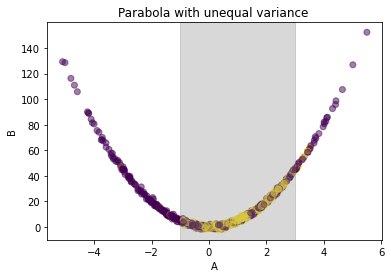

In [120]:

plt.scatter(A,B,c=L,alpha=0.5)
plt.title("Parabola with unequal variance ")
plt.xlabel('A')
plt.ylabel('B')
plt.axvspan(xmin=-1, xmax=3, alpha=0.3, color='gray') 

plt.savefig("./results/journal/plots/fig3_example.png",bbox_inches='tight',dpi=1200)
plt.savefig('./results/journal/plots/fig3_example.svg', bbox_inches='tight',format='svg', dpi=1200)

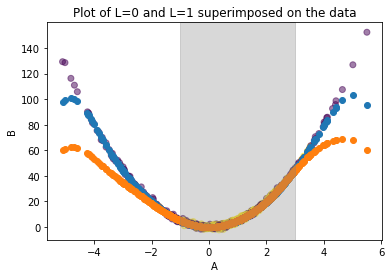

In [121]:
plt.title("Plot of L=0 and L=1 superimposed on the data")
plt.scatter(A,B,c=L,alpha=0.5)
plt.xlabel('A')
plt.ylabel('B')

plt.scatter(A,y_pred_original[0])
plt.scatter(A,y_pred_original[1])
plt.axvspan(xmin=-1, xmax=3, alpha=0.3, color='gray') 
plt.savefig("./results/journal/plots/fig3_example_L.png",bbox_inches='tight',dpi=1200)
plt.savefig('./results/journal/plots/fig3_example_L.svg', bbox_inches='tight',format='svg', dpi=1200)

In [103]:
y_pred_original=compute_Luniqs_predns(L,A,B,'KRR')

In [104]:
y_pred_original


[array([2.20897185e+00, 1.15475126e+01, 6.39770885e+00, 4.27827840e+00,
        2.53387357e+01, 7.66016895e+00, 3.26026070e+00, 4.31222852e+01,
        6.45731431e+00, 1.00293670e+01, 1.14574716e+01, 3.83891640e+00,
        7.52657716e+00, 3.64765709e+01, 3.08418536e+01, 5.48647547e+01,
        3.02436647e+00, 1.03544127e+00, 2.40556808e+01, 9.67021410e+00,
        5.74370988e+00, 2.12553689e+01, 4.54092006e+00, 3.64335494e+00,
        7.66641628e+00, 3.92095099e+00, 1.08518943e+01, 1.68760710e+00,
        1.06301634e+00, 1.56301642e+01, 1.60069315e+00, 6.21942237e+00,
        1.08016063e+01, 5.68023578e+00, 5.73285286e+00, 1.19726348e+01,
        2.48840666e+00, 1.00480459e+01, 1.31274174e+00, 4.32621049e-01,
        7.99072968e+00, 6.21300674e+00, 4.40029907e+01, 1.88244459e+01,
        1.15849282e+01, 1.09888555e+01, 1.08234337e+01, 2.68289626e+01,
        4.32817025e+01, 1.75510814e+00, 8.29049729e+01, 6.64205242e-01,
        7.02497880e+00, 2.17857844e+00, 3.46863180e+00, 2.627130

In [7]:
version=1
presults=pd.read_csv('./results/compare/Linear300nlcd.csv',header=0)
#presults=pd.read_csv(res,header=None,skiprows=1)
#remove the seed columns
presults = presults.iloc[: , :-2]
#presults.insert(0,column='GroundTruth',value=[1]*len(presults))
#presultsInd=pd.read_csv(ind,header=None)
#presultsInd=pd.read_csv('./results/parallel/newalgo/IndpSVR500s100perm.txt',header=0,skipfooter=1)
#presultsInd = presultsInd.iloc[: , :-1]
#presultsInd.insert(0,column='GroundTruth',value=[0]*len(presultsInd))
#pMix=pd.concat([presults,presultsInd],ignore_index=True)
#if version==1:
#    pMix['final_p']=pMix.apply(lambda row: max(row[1],row[2],row[5],row[6]),axis=1)
#elif version==2:
#    pMix['final_p']=pMix.apply(lambda row: max(row[1],row[3],row[5],row[6]),axis=1)
#elif version==3:
#    pMix['final_p']=pMix.apply(lambda row: max(row[1],row[4],row[5],row[6]),axis=1)

In [4]:
one=pd.read_csv('./results/journal/yeast/wilko/nlcd/yeast_causal.csv',header=0)
two=pd.read_csv('./results/journal/yeast/wilko/nlcd/yeast_causal_rev.csv',header=0)

In [5]:
print(sum((one['p_LassocB']<0.05) & (one['p_final']<0.05)))
print(sum(one['p_LassocB']<0.05))
print(sum(one['p_final']<0.05))

261
865
261


In [6]:
print(sum((two['p_LassocB']<0.05) & (two['p_final']<0.05)))
print(sum(two['p_LassocB']<0.05))
print(sum(two['p_final']<0.05))

171
1138
171


In [7]:
sum(two['p_final']<0.05)

171

In [11]:
oneind=pd.read_csv('./results/journal/yeast/wilko/nlcd/yeast_indp.csv',header=0)
twoind=pd.read_csv('./results/journal/yeast/wilko/nlcd/yeast_indp_rev.csv',header=0)

In [12]:
print(sum((oneind['p_LassocB']<0.05) & (oneind['p_final']<0.05)))
print(sum(oneind['p_LassocB']<0.05))
print(sum(oneind['p_final']<0.05))

167
727
167


In [17]:
sum(oneind['p_LassocB']<0.05)

727

In [18]:
sum(twoind['p_final']<0.05)

126

In [14]:
one=pd.read_csv('./results/journal/yeast/wilko/cit/yeast_causal.csv',header=0)
two=pd.read_csv('./results/journal/yeast/wilko/cit/yeast_causal_rev.csv',header=0)

In [15]:
print(sum((one['p_TL']<0.05) & (one['p_cit']<0.05)))
print(sum(one['p_TL']<0.05))
print(sum(one['p_cit']<0.05))

393
1073
393


In [37]:
sum(one['p_cit']<0.05)

95

In [16]:
sum(two['p_cit']<0.05)

152

In [19]:
oneind=pd.read_csv('./results/journal/yeast/wilko/cit/yeast_indp.csv',header=0)
twoind=pd.read_csv('./results/journal/yeast/wilko/cit/yeast_indp_rev.csv',header=0)

In [20]:
print(sum((oneind['p_TL']<0.05) & (oneind['p_cit']<0.05)))
print(sum(oneind['p_TL']<0.05))
print(sum(oneind['p_cit']<0.05))

320
1016
320


In [21]:
print(sum((twoind['p_TL']<0.05) & (twoind['p_cit']<0.05)))
print(sum(twoind['p_TL']<0.05))
print(sum(twoind['p_cit']<0.05))

107
1169
107


In [40]:
sum(one['p_cit']<0.05)

50

In [41]:
sum(two['p_cit']<0.05)

11

In [9]:
############ Muscle plot cytoscape ################
musclecausal=pd.read_csv("./results/journal/human_muscle/nlcd/test_muscle.csv")
musclecausalrev=pd.read_csv("./results/journal/human_muscle/nlcd/test_muscle_rev.csv")
finaldata=pd.concat([musclecausal['p_final'],musclecausalrev['p_final']], axis=1, keys=['A->B', 'B->A'])
result=[]
for index, row in finaldata.iterrows(): 
    if(row['A->B']<0.05 and row['B->A']>0.05):
        result.append('causal')
    elif(row['B->A']<0.05 and row['A->B']>0.05):
        result.append('causal in rev')
    elif(row['A->B']>0.05 and row['B->A']>0.05):
        result.append('independent')
    else:
        result.append('no call')
causal_indices = [i for i, x in enumerate(result) if x == "causal"]
causalrev_indices=[i for i, x in enumerate(result) if x == "causal in rev"]

In [7]:
############ Muscle plot cytoscape ################
fo=open('/data/users/cs20s037/CITNonLinear/yeastandhuman/human_muscle.txt', "r")
pairnames=[]
#fe=open("dataset_params.txt",'w')
while(1):
    line=fo.readline()
    if(line==""):
        break
    line=line.replace("\n","")
    line=line.replace("\"","")
    line=line.split(" ")
    pairnames.append(line[1]+" "+line[2])
    line=fo.readline()
    line=fo.readline()
    line=fo.readline()
fo.close()

In [10]:
############ Muscle plot cytoscape ################
causalnames=[pairnames[i] for i in causal_indices]
causalrevnames=[pairnames[i] for i in causalrev_indices]
causalnamessplit= [i.split() for i in causalnames]
df=pd.DataFrame(causalnamessplit)
df.columns=['source','target']
#df.to_csv("./results/journal/human_muscle/causal.csv",index=False)
causalrevnamessplit= [i.split() for i in causalrevnames]
df=pd.DataFrame(causalrevnamessplit)
df.columns=['source','target']
#df.to_csv("./results/journal/human_muscle/causal_rev.csv",index=False)

In [11]:
pairnames

['ENSG00000079335 ENSG00000127903',
 'ENSG00000225938 ENSG00000180190',
 'ENSG00000142655 ENSG00000251003',
 'ENSG00000085491 ENSG00000113732',
 'ENSG00000085491 ENSG00000211949',
 'ENSG00000143028 ENSG00000099219',
 'ENSG00000181754 ENSG00000186994',
 'ENSG00000143093 ENSG00000213445',
 'ENSG00000162775 ENSG00000147872',
 'ENSG00000116473 ENSG00000071282',
 'ENSG00000116473 ENSG00000183722',
 'ENSG00000231437 ENSG00000102030',
 'ENSG00000134245 ENSG00000106772',
 'ENSG00000155363 ENSG00000259877',
 'ENSG00000155363 ENSG00000104852',
 'ENSG00000081026 ENSG00000174680',
 'ENSG00000116752 ENSG00000255182',
 'ENSG00000116663 ENSG00000165322',
 'ENSG00000011021 ENSG00000179922',
 'ENSG00000162572 ENSG00000138073',
 'ENSG00000224904 ENSG00000259344',
 'ENSG00000273131 ENSG00000229801',
 'ENSG00000273131 ENSG00000215861',
 'ENSG00000273131 ENSG00000236943',
 'ENSG00000273131 ENSG00000122497',
 'ENSG00000273131 ENSG00000272755',
 'ENSG00000273131 ENSG00000201699',
 'ENSG00000273131 ENSG000002

In [12]:
genepairs= [i.split() for i in pairnames]
dfgenepairs=pd.DataFrame(genepairs)

In [14]:
dfgenepairs

,0,1
0,ENSG00000079335,ENSG00000127903
1,ENSG00000225938,ENSG00000180190
2,ENSG00000142655,ENSG00000251003
3,ENSG00000085491,ENSG00000113732
4,ENSG00000085491,ENSG00000211949
...,...,...
3651,ENSG00000094841,ENSG00000198242
3652,ENSG00000102144,ENSG00000143995
3653,ENSG00000085224,ENSG00000123154
3654,ENSG00000237531,ENSG00000249859


In [15]:
dfgenepairs.loc[dfgenepairs[0]=='ENSG00000102554'] #KLF gene

,0,1
923,ENSG00000102554,ENSG00000162520
924,ENSG00000102554,ENSG00000101194
925,ENSG00000102554,ENSG00000198324
926,ENSG00000102554,ENSG00000173546
927,ENSG00000102554,ENSG00000108878
928,ENSG00000102554,ENSG00000173868
929,ENSG00000102554,ENSG00000119986


In [18]:
musclecausal.loc[[923,929,924,925,926,927,928],] # KLF gene in causal direction 

,p_final,p_LassocB,p_LassocA|B,p_AassocB|L,p_LindB|A,OS Test 4,child_seed,parent_seed
923,0.276892,0.023904,0.001992,0.001992,0.276892,0.1513,1703468018709565676,same
929,0.027888,0.027888,0.001992,0.001992,0.025896,0.1513,8662601662053653085,same
924,0.015936,0.001992,0.001992,0.015936,0.003984,0.1513,3215583222528826892,same
925,0.476096,0.001992,0.001992,0.001992,0.476096,0.1513,8183112466568567202,same
926,0.151394,0.007968,0.001992,0.001992,0.151394,0.1513,8388603621912033874,same
927,0.185259,0.079681,0.001992,0.029880,0.185259,0.1513,1339454897000540232,same
928,0.001992,0.001992,0.001992,0.001992,0.001992,0.1513,3082049384395211677,same


In [17]:
musclecausalrev.loc[[923,929,924,925,926,927,928,929],] # KLF gene in causal direction 

,p_final,p_LassocB,p_LassocA|B,p_AassocB|L,p_LindB|A,OS Test 4,child_seed,parent_seed
923,0.581673,0.001992,0.581673,0.001992,0.001992,0.195915,1710523964441350290,same
929,0.440239,0.001992,0.440239,0.007968,0.233068,0.189953,7740010595739644461,same
924,0.129482,0.001992,0.001992,0.129482,0.003984,0.181431,5129287459446801683,same
925,0.404382,0.001992,0.404382,0.001992,0.001992,0.171205,2114941200895685607,same
926,0.914343,0.001992,0.914343,0.001992,0.011952,0.188403,6869089500347521156,same
927,0.225100,0.001992,0.145418,0.225100,0.057769,0.204995,2386019228133432590,same
928,0.007968,0.001992,0.007968,0.001992,0.005976,0.164402,8683716647140342083,same
929,0.440239,0.001992,0.440239,0.007968,0.233068,0.189953,7740010595739644461,same


In [99]:
df

,source,target
0,ENSG00000188234,ENSG00000225784
1,ENSG00000099290,ENSG00000152726
2,ENSG00000227827,ENSG00000254681
3,ENSG00000254681,ENSG00000103226
4,ENSG00000247228,ENSG00000261079
5,ENSG00000090857,ENSG00000261079
6,ENSG00000178127,ENSG00000267809
7,ENSG00000233927,ENSG00000237039
8,ENSG00000242086,ENSG00000236833
9,ENSG00000237075,ENSG00000250138


In [119]:
############ get all 3 values ################
fo=open('/data/users/cs20s037/CITNonLinear/yeastandhuman/human_muscle.txt', "r")
pairnames=[]
#fe=open("dataset_params.txt",'w')
while(1):
    line=fo.readline()
    if(line==""):
        break
    line=line.replace("\n","")
    line=line.replace("\"","")
    line=line.split(" ")
    pairnames.append(line[0]+" "+line[1]+" "+line[2])
    line=fo.readline()
    line=fo.readline()
    line=fo.readline()
fo.close()

In [121]:
genepairs= [i.split() for i in pairnames]
dfgenepairs=pd.DataFrame(genepairs)

In [123]:
dfgenepairs.loc[dfgenepairs[1]=='ENSG00000181997'] 

,0,1,2
3508,9_70176768,ENSG00000181997,ENSG00000228522
3509,9_70176768,ENSG00000181997,ENSG00000186466


In [124]:
dfgenepairs.loc[dfgenepairs[1]=='ENSG00000186466'] 

,0,1,2
3496,9_67901658,ENSG00000186466,ENSG00000147996
3497,9_67901658,ENSG00000186466,ENSG00000181997


In [97]:
len(pairnames)

3656

In [84]:
len(causalrev_indices)

2

In [74]:
sum(musclecausal['p_final']<=0.05)

21

In [78]:

sum(musclecausalrev['p_final']<=0.05)

9

In [4]:
# muscle analysis for cit 
df=pd.read_csv('./results/journal/human_muscle/cit/causal.csv',header=0)

In [12]:
df.head()

,p_cit,p_TL,p_TG,p_GL,p_Lind,childseed,Parentseed
0,0.190047,0.002909,0.190047,3.707569e-08,0.105558,982438870,2075040132
1,0.410397,0.000390,0.410397,2.753044e-03,0.193338,1774889597,2075040132
2,0.623957,0.000003,0.623957,3.662927e-02,0.292087,486872445,2075040132
3,0.966271,0.239051,0.056728,5.495767e-15,0.966271,371407222,2075040132
4,0.645457,0.000244,0.608438,1.530478e-14,0.645457,1285475587,2075040132


In [8]:
df.iloc[[923,929,924,925,926,927,928,929],]

,p_cit,p_TL,p_TG,p_GL,p_Lind,childseed,Parentseed
923,5.377063e-04,5.377063e-04,3.510502e-24,7.403226e-11,1.393117e-27,448089274,2075040132
929,1.205820e-03,1.205820e-03,3.337954e-06,9.244254e-12,1.278674e-05,1563348219,2075040132
924,1.372753e-04,3.255362e-06,1.372753e-04,4.776703e-11,2.303625e-05,1932465664,2075040132
925,2.232606e-06,2.232606e-06,2.713511e-16,1.650188e-09,1.410922e-22,1340347039,2075040132
926,1.403745e-04,1.403745e-04,1.165498e-23,2.282105e-10,3.461275e-15,746517894,2075040132
927,1.071600e-02,1.071600e-02,6.427688e-04,1.877308e-12,2.296946e-04,2064601114,2075040132
928,5.252125e-07,5.252125e-07,6.008787e-13,1.734620e-09,9.550985e-09,57865244,2075040132
929,1.205820e-03,1.205820e-03,3.337954e-06,9.244254e-12,1.278674e-05,1563348219,2075040132


In [10]:
muscledata=read_data("./../../../yeastandhuman/human_muscle.txt")

In [23]:
muscleconfig=read_configuration("./../../../yeastandhuman/human_muscle.txt")

In [31]:
muscleconfig.iloc[925][2]

'ENSG00000198324'

In [16]:
i = 925

In [38]:
### going to plot all the KLF gene scatter plots ######## 
for i in [923,929,924,925,926,927,928,929]:
    plt.scatter(muscledata[i][1],muscledata[i][2],c=muscledata[i][0],alpha=0.6)
    plt.title("KLF gene pair number (zero indexed) "+str(i))
    plt.xlabel("KLF gene ENSG00000102554")
    plt.ylabel(str(muscleconfig.iloc[925][2]))
    plt.savefig('./results/journal/human_muscle/klfgene/index'+ str(i)+'.jpg',dpi=1200)
    plt.clf()


<Figure size 432x288 with 0 Axes>

In [33]:
data = [filename for filename in os.listdir('./results/parallel/10runs/500samples100perm') if filename.startswith("Linear")]
indp = [filename for filename in os.listdir('./results/parallel/10runs/500samples100perm') if filename.startswith("Indp")]


In [58]:
color_algo['KRR']

(0.5960784313725492, 0.3058823529411765, 0.6392156862745098)

In [45]:
cmap

[(0.8941176470588235, 0.10196078431372557, 0.10980392156862737),
 (0.21568627450980393, 0.4941176470588236, 0.7215686274509804)]

In [6]:
def make_table(res,ind,iscit=False):
    precision=[]
    recall=[]
    TN=[]
    FN=[]
    FP=[]
    TP=[]
    if iscit==True:
        citpresults= pd.read_csv(res)
        citpresults.loc[:,'p_res'] = 1
        citpresultsInd= pd.read_csv(ind)
        citpresultsInd.loc[:,'p_res'] = 0
        pCitMix=pd.concat([citpresults,citpresultsInd],ignore_index=True)
        pCitMix.columns= ['pred','p_TL', 'p_TG', 'p_GL','p_Lind','GroundTruth']
        uniq_val=np.unique(pCitMix['pred'])
        
        for i in uniq_val:
            pCitMix['results']=pCitMix.apply (lambda row: 1 if row['pred'] <=i   else 0, axis=1)
            confusion_matrix = metrics.confusion_matrix(pCitMix['GroundTruth'], pCitMix['results']) 
            TN.append(confusion_matrix[0][0])
            FN.append(confusion_matrix[1][0])
            FP.append(confusion_matrix[0][1])
            TP.append(confusion_matrix[1][1])
            precision.append(precision_score(pCitMix['GroundTruth'],pCitMix['results']))
            recall.append(recall_score(pCitMix['GroundTruth'],pCitMix['results']))
        
    else:
        presults= pd.read_csv(res,header=None)
        presults.loc[:,0]=1
        presultsInd=pd.read_csv(ind,header=None)
        presultsInd.loc[:,0]=0
        pMix=pd.concat([presults,presultsInd],ignore_index=True)
        pMix.columns= ['GroundTruth','p_L->A', 'p_L->B', 'conditional']
        pMix['pred']=pMix.apply (lambda row: max(row[1],row[2],row[3]) , axis=1)
        #pMix['pred']=pMix.apply (lambda row: (1/101) if row['pred']==1 else ((100/101) if row['pred']==0 else row['pred']), axis=1)
        pMix['pred']=pMix.apply (lambda row: (row['pred']*100+1)/102 , axis=1)
        uniq_val=np.unique(pMix['pred'])
        for i in uniq_val:
            pMix['results']=pMix.apply (lambda row: 1 if row['pred'] <=i   else 0, axis=1)
            confusion_matrix = metrics.confusion_matrix(pMix['GroundTruth'], pMix['results']) 
            TN.append(confusion_matrix[0][0])
            FN.append(confusion_matrix[1][0])
            FP.append(confusion_matrix[0][1])
            TP.append(confusion_matrix[1][1])
            precision.append(precision_score(pMix['GroundTruth'],pMix['results']))
            recall.append(recall_score(pMix['GroundTruth'],pMix['results']))
    
    table=pd.DataFrame(np.column_stack([uniq_val,TP,FP,TN,FN,precision,recall]),columns=['p cutoffs','TP','FP','TN','FN','precision','recall'])
            
    return table

In [7]:
table1=make_table(res_SVR,ind_SVR)

In [10]:
table1.to_csv("p_cutoff_Linear.csv")

/opt/anaconda3/lib/python3.7/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


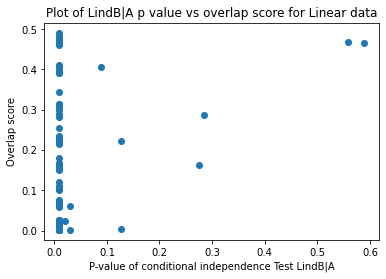

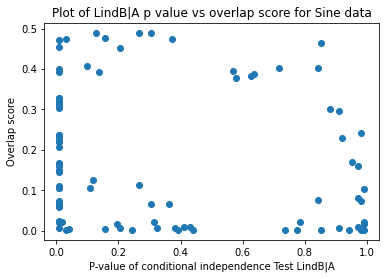

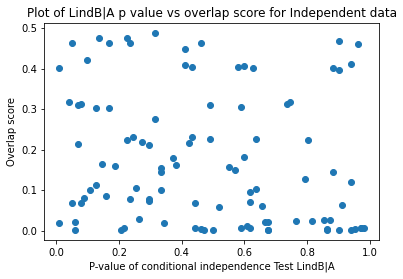

In [112]:
datatype=['Linear','Sine','Indp']
for i in datatype:
    data=pd.read_csv("./results/parallel/newalgosingle/"+i+"KRR1000s100perm.txt",header=0,skipfooter=1)
    #data.columns= ['p_L->A', 'p_L->B', 'p_LindB|A','p_L->A|B','overlap']
    #data['p_LindB|A']= (data['p_LindB|A']*100 + 1)/(102)
    plt.figure()
    plt.scatter(data['p_LindB|A'],data['OS Test 4'])
    if(i=='Indp'):
        plt.title("Plot of LindB|A p value vs overlap score for Independent data")
    else:
        plt.title("Plot of LindB|A p value vs overlap score for "+i+" data")
    plt.xlabel('P-value of conditional independence Test LindB|A')
    plt.ylabel('Overlap score')
    plt.savefig("./results/parallel/plots/overlapfig"+i+"KRR1000s100perm.png")

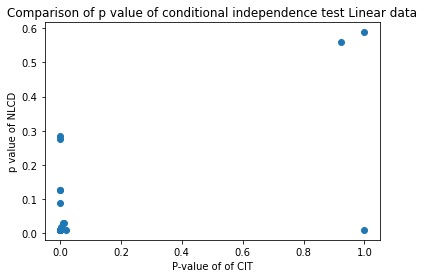

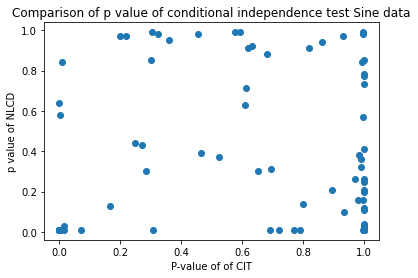

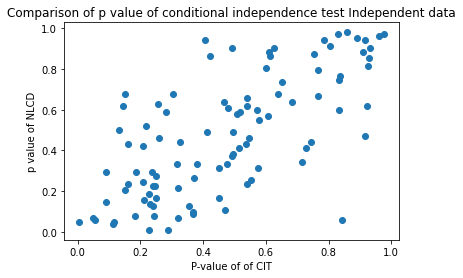

In [119]:
datatype=['Linear','Sine','Indp']
for i in datatype:
    data=pd.read_csv("./results/parallel/newalgosingle/"+i+"KRR1000s100perm.txt",header=0,skipfooter=1)
    data_cit=pd.read_csv("./results/parallel/newalgocit/"+i+"1000cit.csv",header=0)
    #data_cit['p_Lind']
    #data.columns= ['p_L->A', 'p_L->B', 'p_LindB|A','p_L->A|B','overlap']
    #data['p_LindB|A']= (data['p_LindB|A']*100 + 1)/(102)
    plt.figure()
    plt.scatter(data_cit['p_Lind'],data['p_LindB|A'])
    if(i=='Indp'):
        plt.title("Comparison of p value of conditional independence test Independent data")
    else:
        plt.title("Comparison of p value of conditional independence test "+i+" data")
    plt.xlabel('P-value of of CIT')
    plt.ylabel('p value of NLCD')
    plt.savefig("./results/parallel/plots/pvalcomparison"+i+"KRR1000s100permCIT.png")

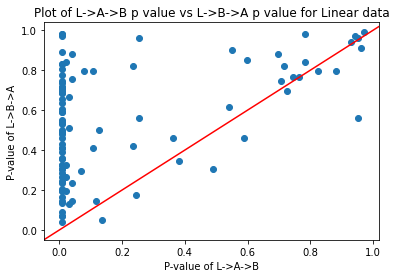

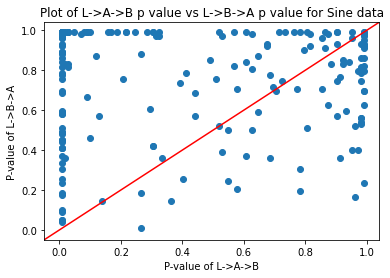

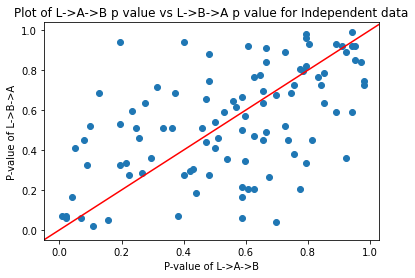

In [75]:
## plot between the p value of L->A->B vs L->B->A for the synthetic data 
datatype=['Linear','Sine','Indp']
for i in datatype:
    data=pd.read_csv("./results/update/2way/"+i+"1000SVRp100.txt",skiprows=1,header=None)
    data.columns= ['p_L->A', 'p_L->B', 'p_LindB|A','p_L->A|B','overlap','p_L->A_rev', 'p_L->B_rev', 'p_LindB|A_rev','p_L->A|B_rev','overlap_rev']
    data['pred']=data.apply (lambda row: max(row[0],row[1],row[2],row[3]) , axis=1)
    data['pred_rev']=data.apply (lambda row: max(row[5],row[6],row[7],row[8]) , axis=1)
    data['pred']= (data['pred']*100 + 1)/(102)
    data['pred_rev']= (data['pred_rev']*100 + 1)/(102)
    plt.figure()
    plt.scatter(data['pred'],data['pred_rev'])
    plt.axline((0, 0), slope=1,color='red')
    if(i=='Indp'):
        plt.title("Plot of L->A->B p value vs L->B->A p value for Independent data")
    else:
        plt.title("Plot of L->A->B p value vs L->B->A p value for "+i+" data")
    plt.xlabel('P-value of L->A->B')
    plt.ylabel('P-value of L->B->A')
    plt.savefig("./results/update/plots/twowayfig"+i+"1000s100perm.png")
  

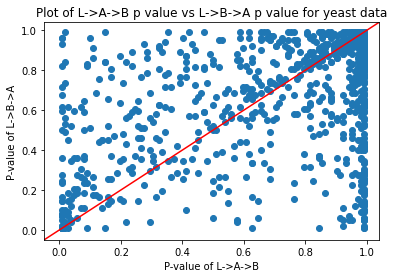

In [79]:
## plot between the p value of L->A->B vs L->B->A for the yeast 
yeastcausal=pd.read_csv("./results/update/2way/causal1kp100.txt",skiprows=1,header=None)
yeastcausalrev=pd.read_csv("./results/update/2way/causal1kp100rev.txt",skiprows=1,header=None)
yeastcausal.columns= ['p_L->A', 'p_L->B', 'p_LindB|A','p_L->A|B','overlap']
yeastcausalrev.columns=['p_L->A_rev', 'p_L->B_rev', 'p_LindB|A_rev','p_L->A|B_rev','overlap_rev']
yeastcausal['pred']=yeastcausal.apply (lambda row: max(row[0],row[1],row[2],row[3]) , axis=1)
yeastcausalrev['pred_rev']=yeastcausalrev.apply (lambda row: max(row[0],row[1],row[2],row[3]) , axis=1)
yeastcausal['pred']= (yeastcausal['pred']*100 + 1)/(102)
yeastcausalrev['pred_rev']= (yeastcausalrev['pred_rev']*100 + 1)/(102)
plt.figure()
plt.scatter(yeastcausal['pred'],yeastcausalrev['pred_rev'])
plt.axline((0, 0), slope=1,color='red')
plt.title("Plot of L->A->B p value vs L->B->A p value for yeast data")
plt.xlabel('P-value of L->A->B')
plt.ylabel('P-value of L->B->A')
plt.savefig("./results/update/plots/twowayyeast1000s100perm.png")
  

In [153]:
#code to find the number of causal trios ############# ###using the same code for independent data
## plot between the p value of L->A->B vs L->B->A for the yeast 
yeastcausal=pd.read_csv("./results/update/2way/indep1kp100.txt",skiprows=1,header=None)
yeastcausalrev=pd.read_csv("./results/update/2way/indep1kp100rev.txt",skiprows=1,header=None)
yeastcausal.columns= ['p_L->A', 'p_L->B', 'p_LindB|A','p_L->A|B','overlap']
yeastcausalrev.columns=['p_L->A_rev', 'p_L->B_rev', 'p_LindB|A_rev','p_L->A|B_rev','overlap_rev']
yeastcausal['pred']=yeastcausal.apply (lambda row: max(row[0],row[1],row[2],row[3]) , axis=1)
yeastcausalrev['pred_rev']=yeastcausalrev.apply (lambda row: max(row[0],row[1],row[2],row[3]) , axis=1)
yeastcausal['pred']= (yeastcausal['pred']*100 + 1)/(102)
yeastcausalrev['pred_rev']= (yeastcausalrev['pred_rev']*100 + 1)/(102)

  

In [154]:
sum(yeastcausal['pred']<=0.05)

48

In [155]:
sum(yeastcausalrev['pred_rev']<=0.05)

27

In [156]:
finaldata=pd.concat([yeastcausal['pred'],yeastcausalrev['pred_rev']], axis=1, keys=['A->B', 'B->A'])

In [157]:
result=[]
for index, row in finaldata.iterrows(): 
    if(row['A->B']<0.05 and row['B->A']>0.05):
        result.append('causal')
    elif(row['B->A']<0.05 and row['A->B']>0.05):
        result.append('causal in rev')
    elif(row['A->B']>0.05 and row['B->A']>0.05):
        result.append('independent')
    else:
        result.append('no call')
    

In [158]:
causal_indices = [i for i, x in enumerate(result) if x == "causal"]
causalrev_indices=[i for i, x in enumerate(result) if x == "causal in rev"]

In [160]:
len(causal_indices)

33

In [159]:
len(causalrev_indices)

12

In [161]:
fo=open('/data/users/cs20s037/CITNonLinear/oldfiles/yeast_residual_data_full_1000_gt_2.txt', "r")
pairnames=[]
#fe=open("dataset_params.txt",'w')
while(1):
    line=fo.readline()
    if(line==""):
        break
    line=line.replace("\n","")
    line=line.replace("\"","")
    line=line.split(" ")
    pairnames.append(line[2]+" "+line[3])
    line=fo.readline()
    line=fo.readline()
    line=fo.readline()
fo.close()


In [162]:
pairnames

['YDR310C YDL047W',
 'YMR182C YOR261C',
 'YKR034W YOR353C',
 'YBR239C YLR180W',
 'YHL027W YGR138C',
 'YDR421W YBR104W',
 'YGR044C YOL111C',
 'YDR423C YLR185W',
 'YMR164C YOR237W',
 'YHL020C YDR334W',
 'YDR423C YBL099W',
 'YMR016C YPL248C',
 'YMR164C YBR001C',
 'YKL185W YDL095W',
 'YKL038W YOR190W',
 'YMR164C YLL006W',
 'YHR178W YJR074W',
 'YGR044C YFR031C',
 'YFL021W YOR388C',
 'YNL314W YKL051W',
 'YNL199C YHR081W',
 'YDR216W YDL101C',
 'YGR044C YLR051C',
 'YOR363C YER033C',
 'YFR034C YFR051C',
 'YDL170W YBR081C',
 'YFR034C YPL183C',
 'YMR021C YCR005C',
 'YGL237C YHL004W',
 'YHR206W YGR162W',
 'YMR182C YML072C',
 'YHR178W YMR188C',
 'YKL038W YLR384C',
 'YKL109W YGR232W',
 'YOL067C YHL033C',
 'YNL068C YER117W',
 'YDR423C YPR152C',
 'YCR065W YIL101C',
 'YOR140W YDR502C',
 'YDR423C YIL075C',
 'YPL248C YGL201C',
 'YFL021W YGR144W',
 'YIR017C YOR286W',
 'YDL170W YMR199W',
 'YIR033W YKL185W',
 'YER045C YJL148W',
 'YKL185W YBR137W',
 'YOR363C YHL020C',
 'YDR259C YMR214W',
 'YPL133C YML048W',


In [163]:
causalnames=[pairnames[i] for i in causal_indices]
causalrevnames=[pairnames[i] for i in causalrev_indices]

In [144]:
causalnamessplit= [i.split() for i in causalnames]
df=pd.DataFrame(causalnamessplit)
df.columns=['source','target']
df.to_csv("causalfromindepyeast.csv",index=False)

In [152]:
causalrevnamessplit= [i.split() for i in causalrevnames]
df=pd.DataFrame(causalrevnamessplit)
df.columns=['source','target']
df.to_csv("causalfromindepyeastrev.csv",index=False)

In [101]:
#result.count('independent')

921

In [63]:
data

,p_L->A,p_L->B,p_LindB|A,p_L->A|B,overlap,p_L->A_rev,p_L->B_rev,p_LindB|A_rev,p_L->A|B_rev,overlap_rev
0,0.73,0.60,0.11,0.53,0.469683,0.66,0.70,0.21,0.63,0.469070
1,0.09,0.77,0.13,0.21,0.472220,0.77,0.10,0.45,0.60,0.486001
2,0.23,0.43,0.54,0.14,0.482431,0.41,0.11,0.62,0.21,0.479811
3,0.03,0.96,0.76,0.01,0.464626,0.97,0.04,0.32,0.83,0.483974
4,0.04,0.08,0.49,0.05,0.473504,0.13,0.08,0.02,0.30,0.479307
...,...,...,...,...,...,...,...,...,...,...
95,0.00,0.00,0.00,0.00,0.297283,0.00,0.00,0.00,0.75,0.398212
96,0.00,0.00,0.00,0.00,0.322121,0.00,0.00,0.00,0.69,0.404346
97,0.00,0.00,0.00,0.00,0.312582,0.00,0.00,0.00,0.72,0.394068
98,0.00,0.00,0.00,0.00,0.291871,0.00,0.00,0.00,0.78,0.351253


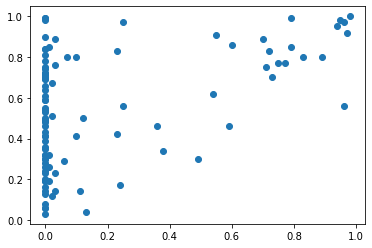

In [68]:
plt.scatter(data['pred'],data['pred_rev'])


In [70]:
data

,p_L->A,p_L->B,p_LindB|A,p_L->A|B,overlap,p_L->A_rev,p_L->B_rev,p_LindB|A_rev,p_L->A|B_rev,overlap_rev,pred,pred_rev
0,0.73,0.60,0.11,0.53,0.469683,0.66,0.70,0.21,0.63,0.469070,0.725490,0.70
1,0.09,0.77,0.13,0.21,0.472220,0.77,0.10,0.45,0.60,0.486001,0.764706,0.77
2,0.23,0.43,0.54,0.14,0.482431,0.41,0.11,0.62,0.21,0.479811,0.539216,0.62
3,0.03,0.96,0.76,0.01,0.464626,0.97,0.04,0.32,0.83,0.483974,0.950980,0.97
4,0.04,0.08,0.49,0.05,0.473504,0.13,0.08,0.02,0.30,0.479307,0.490196,0.30
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.00,0.00,0.00,0.00,0.297283,0.00,0.00,0.00,0.75,0.398212,0.009804,0.75
96,0.00,0.00,0.00,0.00,0.322121,0.00,0.00,0.00,0.69,0.404346,0.009804,0.69
97,0.00,0.00,0.00,0.00,0.312582,0.00,0.00,0.00,0.72,0.394068,0.009804,0.72
98,0.00,0.00,0.00,0.00,0.291871,0.00,0.00,0.00,0.78,0.351253,0.009804,0.78


In [15]:
#checking the difference between second test for regression and the FI test for test 2 
df=pd.read_csv("./results/parallel/human/secondtime/SineSVR500s100perm.txt",header=None,skiprows=1)
df.columns=['p_final','LB','LA|B','AB|L','LindB|A','regress','OStest2','OStest4']

Text(0, 0.5, 'Using regressing out ')

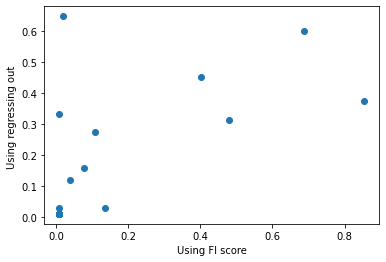

In [16]:
plt.scatter(df['LA|B'],df['regress'])
plt.xlabel('Using FI score')
plt.ylabel('Using regressing out ')

In [21]:
df['final_FI']=df.apply (lambda row: max(row[1],row[2],row[3],row[4]) , axis=1)

In [22]:
df['final_regress']=df.apply (lambda row: max(row[1],row[2],row[3],row[5]) , axis=1)

In [23]:
sum(df['final_FI']<0.05)

36

In [24]:
sum(df['final_regress']<0.05)

49

In [19]:
sum(df['p_final']<0.05)

36

In [18]:
sum(df['LA|B']<0.05)

93

In [3]:
new=pd.read_csv('./results/comparewitholdLinear1000KRRp1000.csv',header=0)

In [4]:
new

,LB_p,LA|Bv1,LA|Bv2,LA|Bv3,AB|L,LindB|A,OSt2v2,OSt2v3,OSt4,seed,parent_seed
0,0.656863,0.686275,0.852941,0.921569,0.068627,0.196078,0.469683,0.469070,0.469683,2113940365817139527,328843483580361856623349466212758650087
1,0.813725,0.205882,0.872549,0.627451,0.039216,0.127451,0.472220,0.486001,0.472220,5033757513616199037,same
2,0.343137,0.147059,0.323529,0.254902,0.009804,0.598039,0.482431,0.479811,0.482431,3245742229461289655,same
3,0.990196,0.039216,0.401961,0.235294,0.009804,0.735294,0.464626,0.483974,0.464626,4912062430845654245,same
4,0.058824,0.088235,0.637255,0.196078,0.009804,0.460784,0.473504,0.479307,0.473504,8162889587901115528,same
...,...,...,...,...,...,...,...,...,...,...,...
95,0.009804,0.009804,0.617647,0.009804,0.009804,0.009804,0.297283,0.398212,0.297283,5254923284346769657,same
96,0.009804,0.009804,0.529412,0.009804,0.009804,0.009804,0.322121,0.404346,0.322121,5506403943864711293,same
97,0.009804,0.009804,0.617647,0.009804,0.009804,0.009804,0.312582,0.394068,0.312582,4698085219510188447,same
98,0.009804,0.009804,0.823529,0.009804,0.009804,0.009804,0.291871,0.351253,0.291871,167099283432432320,same


In [6]:
old=pd.read_csv('./results/parallel/initialtable/LinearKRR1000s100perm.txt',header=None,skiprows=1)

In [7]:
old

,0,1,2,3,4
0,0.75,0.59,0.24,0.69,0.469683
1,0.16,0.84,0.09,0.22,0.472220
2,0.27,0.42,0.48,0.10,0.482431
3,0.05,0.98,0.72,0.05,0.464626
4,0.09,0.05,0.50,0.06,0.473504
...,...,...,...,...,...
95,0.00,0.00,0.00,0.00,0.297283
96,0.00,0.00,0.00,0.00,0.322121
97,0.00,0.00,0.00,0.00,0.312582
98,0.00,0.00,0.00,0.00,0.291871


Text(0.5, 1.0, 'Old L->B vs new L->B test ')

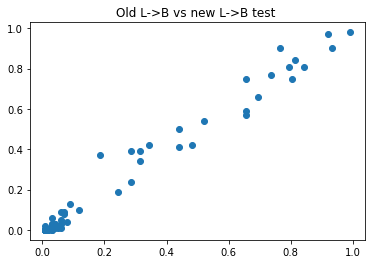

In [11]:
plt.scatter(new['LB_p'],old[1])
plt.title('Old L->B vs new L->B test ')

Text(0.5, 1.0, 'Old test 2 reg vs new test 2 reg ')

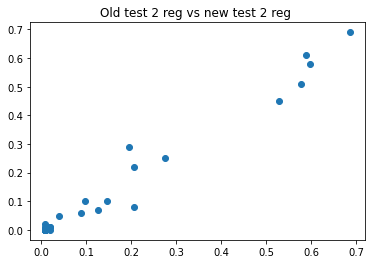

In [13]:
plt.scatter(new['LA|Bv1'],old[3])
plt.title('Old test 2 reg vs new test 2 reg ')

Text(0, 0.5, 'FI test old code')

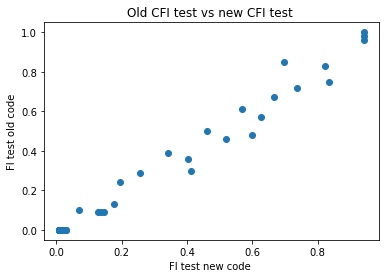

In [16]:
plt.scatter(new['LindB|A'],old[2])
plt.title('Old CFI test vs new CFI test ')
plt.xlabel('FI test new code ')
plt.ylabel('FI test old code')

(array([ 4.,  3.,  8.,  7., 11.,  7., 16.,  9., 18., 17.]),
 array([0.019608 , 0.1166668, 0.2137256, 0.3107844, 0.4078432, 0.504902 ,
        0.6019608, 0.6990196, 0.7960784, 0.8931372, 0.990196 ]),
 <BarContainer object of 10 artists>)

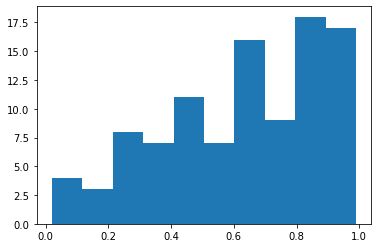

In [17]:
plt.hist(new['LA|Bv2'])

In [31]:
#testing to read the configurations or the trios 
############ Muscle plot cytoscape ################
data=''
def configuration(data):
    fo=open(data, "r")
    confignames=[]
    if(data.find('yeast')==-1 and data.find('human')==-1): #if yeast is not present
        line=fo.readline() # read the line, the control will start from the next line 
    while(1):
        line=fo.readline()
        if(line==""):
            break
        line=line.replace("\n","")
        line=line.replace("\"","")
        line=line.split(" ")  
        configs=[]  
        for i in line: 
            configs.append(i)
        confignames.append(configs)
        line=fo.readline()
        line=fo.readline()
        line=fo.readline()
    fo.close()
    return pd.DataFrame(confignames)


In [33]:
configuration('/data/users/cs20s037/CITNonLinear/yeastandhuman/human_muscle.txt')

,0,1,2
0,1_100880328,ENSG00000079335,ENSG00000127903
1,1_101368442,ENSG00000225938,ENSG00000180190
2,1_10571142,ENSG00000142655,ENSG00000251003
3,1_108737586,ENSG00000085491,ENSG00000113732
4,1_108737586,ENSG00000085491,ENSG00000211949
...,...,...,...
3651,X_74100893,ENSG00000094841,ENSG00000198242
3652,X_76898828,ENSG00000102144,ENSG00000143995
3653,X_77482085,ENSG00000085224,ENSG00000123154
3654,X_954665,ENSG00000237531,ENSG00000249859


In [29]:
pd.DataFrame(confignames)

,0,1
0,0.1,0.1
1,0.1,0.5
2,0.1,1
3,0.1,1.5
4,0.1,2
...,...,...
95,6,2.5
96,6,3
97,6,4
98,6,5
